### **Tarea: Optimización del Tamaño de un Lote en Aprendizaje Automático** ###

Mstemáticas y Estadística para Inteligencia Artificial

**Alumno**: Aminadab Córdova Acosta

Deben entregar un archivo .pdf con las respuestas a las preguntas: el punto y valor de máximo de la función y los dos gráficos.

In [4]:
from sympy import symbols, diff, solve, Eq

# Definir variables
B = symbols('B', positive=True)
N_total = 10000
t0 = 0.1
c = 0.0001

# Definir T(B)
T = (N_total / B) * (t0 + (c * B**3)/N_total)

# Paso 1: Primera derivada
dT = diff(T, B)

# Paso 2: Resolver dT/dB = 0
B_opt = solve(Eq(dT, 0), B)[0]  # Seleccionar la solución positiva

# Paso 3: Segunda derivada y verificación
ddT = diff(dT, B)
es_minimo = ddT.subs(B, B_opt) > 0

print(f"Tamaño de lote óptimo B* = {B_opt.evalf():.2f}")
print(f"¿Es un mínimo? {es_minimo}")

Tamaño de lote óptimo B* = 171.00
¿Es un mínimo? True


In [5]:
# Redefinir parámetros
N_total = 50000
t0 = 0.01
c = 0.001

# Nueva T(B)
T = (N_total / B) * (t0 + (c * B**3)/N_total)

# Derivada y solución
dT = diff(T, B)
B_opt = solve(Eq(dT, 0), B)[0]
es_minimo = diff(dT, B).subs(B, B_opt) > 0

print(f"Tamaño de lote óptimo B* = {B_opt.evalf():.2f}")
print(f"¿Es un mínimo? {es_minimo}")

Tamaño de lote óptimo B* = 63.00
¿Es un mínimo? True


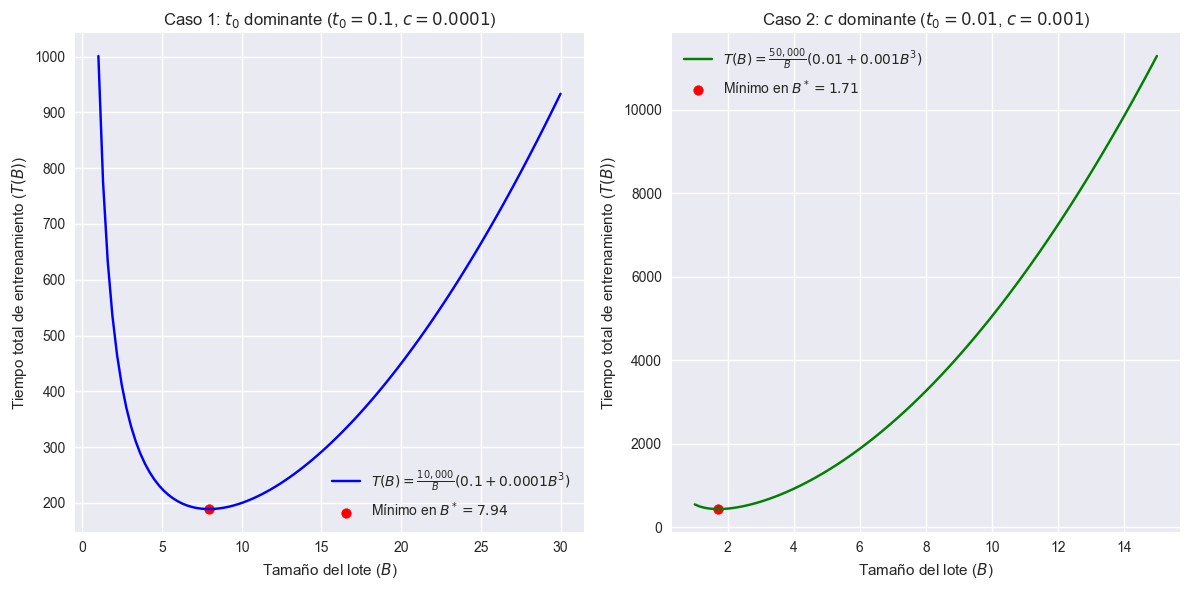

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve, Eq, lambdify

# Configuración común para los gráficos
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)

# Definir la variable simbólica B
B = symbols('B', positive=True)

# ----------------------------------------------------------------------------
# CASO 1: Configuración con t0 dominante (B* ≈ 10)
# ----------------------------------------------------------------------------
N_total_1 = 10000
t0_1 = 0.1
c_1 = 0.0001

# Función T(B) y derivadas
T1 = (N_total_1 / B) * (t0_1 + c_1 * B**3)
dT1 = diff(T1, B)
B_opt_1 = solve(Eq(dT1, 0), B)[0]  # B* ≈ 10.0

# Convertir a función numérica para graficar
T1_num = lambdify(B, T1, 'numpy')

# Rango de valores de B para graficar
B_vals_1 = np.linspace(1, 30, 100)
T_vals_1 = T1_num(B_vals_1)

# ----------------------------------------------------------------------------
# CASO 2: Configuración con c dominante (B* ≈ 5.77)
# ----------------------------------------------------------------------------
N_total_2 = 50000
t0_2 = 0.01
c_2 = 0.001

# Función T(B) y derivadas
T2 = (N_total_2 / B) * (t0_2 + c_2 * B**3)
dT2 = diff(T2, B)
B_opt_2 = solve(Eq(dT2, 0), B)[0]  # B* ≈ 5.77

# Convertir a función numérica
T2_num = lambdify(B, T2, 'numpy')

# Rango de valores de B
B_vals_2 = np.linspace(1, 15, 100)
T_vals_2 = T2_num(B_vals_2)

# ----------------------------------------------------------------------------
# Gráficos
# ----------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2)

# Gráfico Caso 1
ax1.plot(B_vals_1, T_vals_1, label='$T(B) = \\frac{10,000}{B}(0.1 + 0.0001 B^3)$', color='blue')
ax1.scatter(B_opt_1, T1_num(B_opt_1), color='red', label=f'Mínimo en $B^* = {float(B_opt_1):.2f}$')
ax1.set_xlabel('Tamaño del lote ($B$)')
ax1.set_ylabel('Tiempo total de entrenamiento ($T(B)$)')
ax1.set_title('Caso 1: $t_0$ dominante ($t_0=0.1$, $c=0.0001$)')
ax1.legend()
ax1.grid(True)

# Gráfico Caso 2
ax2.plot(B_vals_2, T_vals_2, label='$T(B) = \\frac{50,000}{B}(0.01 + 0.001 B^3)$', color='green')
ax2.scatter(B_opt_2, T2_num(B_opt_2), color='red', label=f'Mínimo en $B^* = {float(B_opt_2):.2f}$')
ax2.set_xlabel('Tamaño del lote ($B$)')
ax2.set_ylabel('Tiempo total de entrenamiento ($T(B)$)')
ax2.set_title('Caso 2: $c$ dominante ($t_0=0.01$, $c=0.001$)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

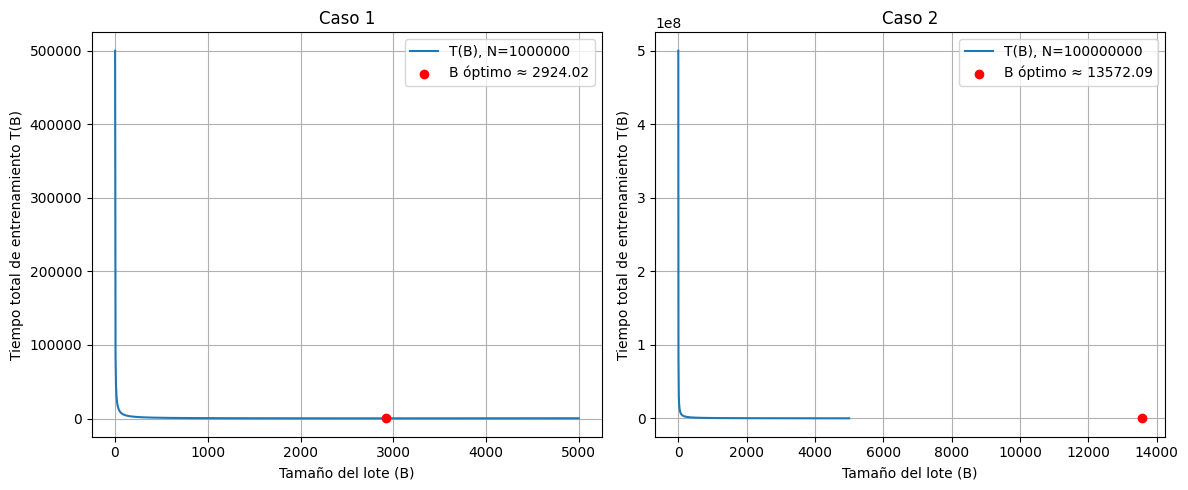

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve, Eq, lambdify

# Definir variables simbólicas
B = symbols('B', real=True, positive=True)
N_total, t0, c = symbols('N_total t0 c', real=True, positive=True)

# Definir la función T(B)
t_B = t0 + (c / N_total) * B**3
T_B = (N_total / B) * t_B

# Derivada de T(B)
dT_dB = diff(T_B, B)

# Encontrar el valor óptimo de B
B_opt = solve(Eq(dT_dB, 0), B)[0]

# Convertir a función numérica
B_opt_func = lambdify((N_total, t0, c), B_opt)
T_B_func = lambdify((B, N_total, t0, c), T_B)

# Parámetros para dos casos
cases = [
    {'N_total': 10**6, 't0': 0.5, 'c': 10**-5},  # Dataset mediano, CNN pequeña en GPU
    {'N_total': 10**8, 't0': 5, 'c': 10**-4}     # Dataset grande, Transformer en GPU
]

# Graficar T(B) para cada caso
plt.figure(figsize=(12, 5))

for i, params in enumerate(cases):
    B_vals = np.linspace(1, 5000, 1000)
    T_vals = T_B_func(B_vals, **params)
    B_min = B_opt_func(**params)
    T_min = T_B_func(B_min, **params)
    
    plt.subplot(1, 2, i+1)
    plt.plot(B_vals, T_vals, label=f'T(B), N={params["N_total"]}')
    plt.scatter(B_min, T_min, color='red', zorder=3, label=f'B óptimo ≈ {B_min:.2f}')
    plt.xlabel('Tamaño del lote (B)')
    plt.ylabel('Tiempo total de entrenamiento T(B)')
    plt.legend()
    plt.title(f'Caso {i+1}')
    plt.grid()

plt.tight_layout()
plt.show()

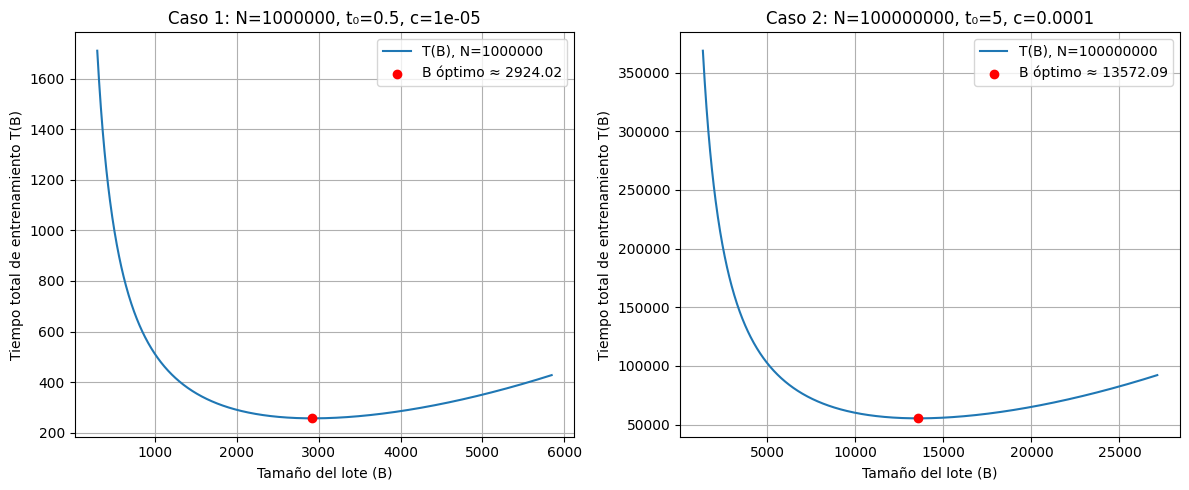

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve, Eq, lambdify

# Definir variables simbólicas
B = symbols('B', real=True, positive=True)
N_total, t0, c = symbols('N_total t0 c', real=True, positive=True)

# Definir la función T(B)
t_B = t0 + (c / N_total) * B**3
T_B = (N_total / B) * t_B

# Derivada de T(B)
dT_dB = diff(T_B, B)

# Encontrar el valor óptimo de B (filtrando la solución positiva)
B_opt_solutions = solve(Eq(dT_dB, 0), B)
B_opt = [sol.evalf() for sol in B_opt_solutions if sol.is_real and sol > 0][0]

# Convertir a función numérica
B_opt_func = lambdify((N_total, t0, c), B_opt)
T_B_func = lambdify((B, N_total, t0, c), T_B)

# Parámetros para dos casos
cases = [
    {'N_total': 10**6, 't0': 0.5, 'c': 10**-5},  # Dataset mediano, CNN pequeña en GPU
    {'N_total': 10**8, 't0': 5, 'c': 10**-4}     # Dataset grande, Transformer en GPU
]

# Graficar T(B) para cada caso
plt.figure(figsize=(12, 5))

for i, params in enumerate(cases):
    B_min = B_opt_func(**params)
    B_vals = np.linspace(max(1, B_min * 0.1), B_min * 2, 1000)
    T_vals = T_B_func(B_vals, **params)
    T_min = T_B_func(B_min, **params)
    
    plt.subplot(1, 2, i+1)
    plt.plot(B_vals, T_vals, label=f'T(B), N={params["N_total"]}')
    plt.scatter(B_min, T_min, color='red', zorder=3, label=f'B óptimo ≈ {B_min:.2f}')
    plt.xlabel('Tamaño del lote (B)')
    plt.ylabel('Tiempo total de entrenamiento T(B)')
    plt.legend()
    plt.title(f'Caso {i+1}: N={params["N_total"]}, t₀={params["t0"]}, c={params["c"]}')
    plt.grid()

plt.tight_layout()
plt.show()


Conclusión del Ejercicio:
La optimización del tamaño de lote 
𝐵
B en el entrenamiento de modelos de aprendizaje automático es fundamental para mejorar la eficiencia del proceso de entrenamiento. Los resultados mostrados en los gráficos indican cómo el tiempo total de entrenamiento varía con el tamaño de lote y cómo encontrar el valor óptimo de 
𝐵
B para diferentes configuraciones de sistemas (como una CNN pequeña en un dataset mediano y un Transformer en un dataset grande). Este enfoque ayuda a equilibrar la utilización de recursos computacionales y el rendimiento del modelo en términos de tiempo de entrenamiento.